# Derivatives, a Helpful Lesson 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from jax import grad
from sympy import symbols, lambdify 
import sympy as sym

## Single Variable Derivatives

Let's start with a single variable function. Consider the function 
\begin{align}
f(x) = 3x^2 + 2x + 10. 
\end{align} 

What is $df/dx$ evaluated at $x=2$? First we will use SymPy to compute a symbolic expression. Then we can convert that symbolic expression to a function using `lambdify`. Finally, we can compare that output to the evaluation with JAX.

In [50]:
x = symbols("x")
f = 3*x**2 + 2*x + 10 
f

3*x**2 + 2*x + 10

In [51]:
dfdx = f.diff(x)
print("The derivative of f is:") 
dfdx

The derivative of f is:


6*x + 2

In [52]:
# lambdify the function 
dfdx = lambdify(x,dfdx)

# evaluate at x = 2
print("The derivative evaluated at x=2 is:") 
dfdx(2) 

The derivative evaluated at x=2 is:


14

We will now use Jax to evalute the derivative. 

In [53]:
def func(x):
    return 3*x**2 + 2*x + 10 

grad_f = grad(func)

In [54]:
# evaluted at x=2
grad_f(2.0)

Array(14., dtype=float32, weak_type=True)

## Multivariable Derivatives 

Consider the function 
\begin{align} 
f(x_1, x_2) = -x_1^2  -\frac{1}{2} x_2^2.
\end{align} 

Below is a contour plot of $f$ along with a surface plot.

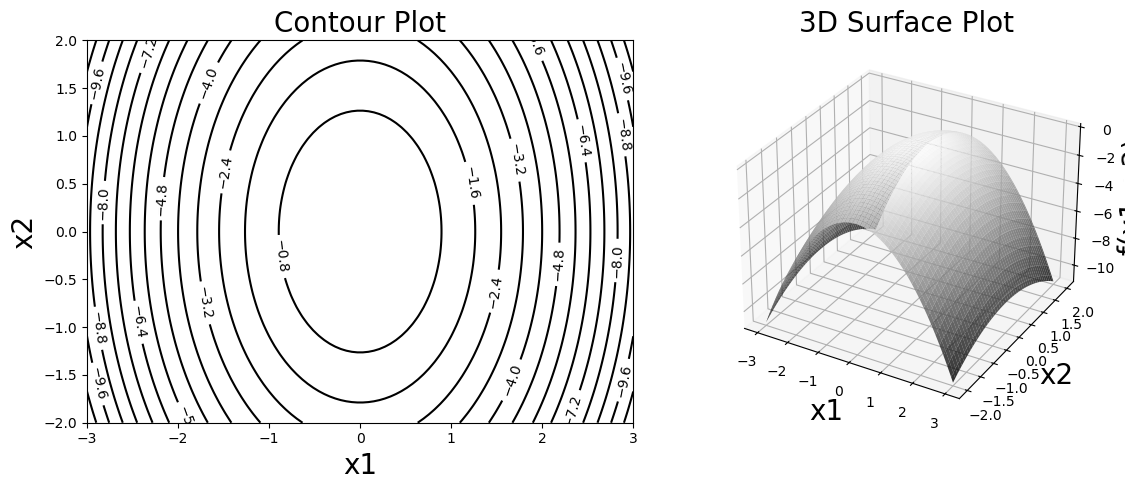

In [62]:
# Define the function f = -x[0]^2 - 0.5*x[1]^2 for oval contours
def f(x):
    return -x[0]**2 - 0.5*x[1]**2

# Create grid
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2])

# Create figure with subplots
fig = plt.figure(figsize=(12, 5))

# Contour plot
ax1 = fig.add_subplot(1, 2, 1)
contour = ax1.contour(X1, X2, Z, "-", levels=15, colors='black',linestyles='solid')
ax1.clabel(contour, inline=True, fontsize=10)
ax1.set_xlabel('x1', fontsize=20)
ax1.set_ylabel('x2', fontsize=20)
ax1.set_title('Contour Plot', fontsize=20)

# 3D plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, Z, cmap='gray', alpha=0.8)
ax2.set_xlabel('x1', fontsize=20)
ax2.set_ylabel('x2', fontsize=20)
ax2.set_zlabel('f(x1, x2)', fontsize=20)
ax2.set_title('3D Surface Plot', fontsize=20)

plt.tight_layout()
plt.show()

The contour plot shows the lines where $f$ is constant. You can think of this as akin to a topographic map. The function $f$ plays the role of altitude. The contour lines are paths of constant altitude. From the surface plot and the contour plot we can see how $f$ changes with respect to the variables. 

Another way to visualize the variable dependence is to hold one variable fixed, and let the other vary. This is ploting cross sections. Below I plot cross sections at $x_1=0$ and $x_2=0$. For example, holding $x_1$ fixed at $x_1=0$, I then plot $f(x_1=0, x_2) = -\frac{1}{2} x_2^2$, similar for the $x_2=0$ cross section.

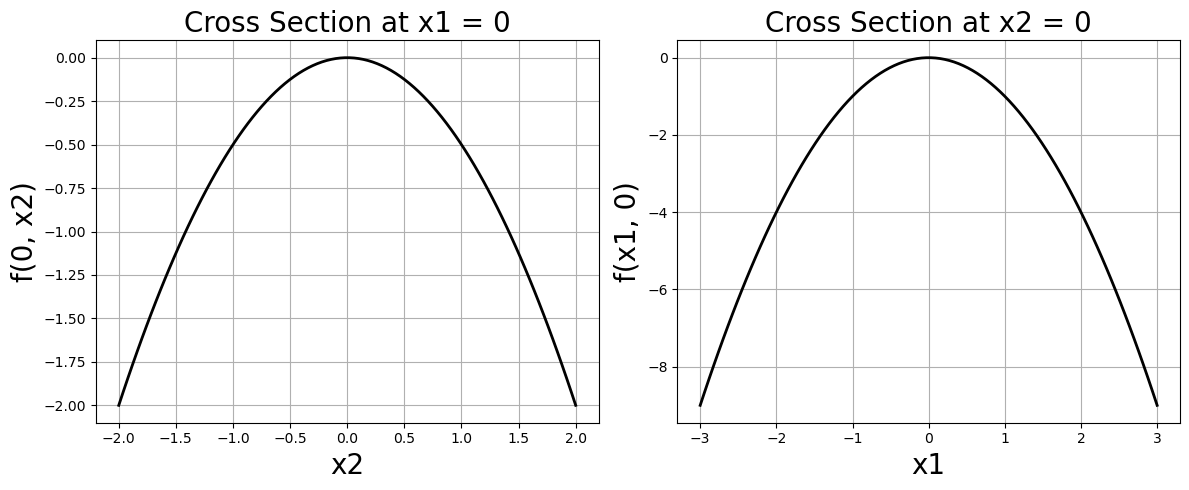

In [63]:
# Calculate cross sections
# Cross section at x1 = 0: f([0, x2]) = -0.5*x2^2
f_x1_0 = [f([0, x2_val]) for x2_val in x2]

# Cross section at x2 = 0: f([x1, 0]) = -x1^2
f_x2_0 = [f([x1_val, 0]) for x1_val in x1]

# Create figure with subplots
fig = plt.figure(figsize=(12, 5))

# Plot cross section at x1 = 0
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x2, f_x1_0, 'k-', linewidth=2)
ax1.set_xlabel('x2', fontsize=20)
ax1.set_ylabel('f(0, x2)', fontsize=20)
ax1.set_title('Cross Section at x1 = 0', fontsize=20)
ax1.grid(True)

# Plot cross section at x2 = 0
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x1, f_x2_0, 'k-', linewidth=2)
ax2.set_xlabel('x1', fontsize=20)
ax2.set_ylabel('f(x1, 0)', fontsize=20)
ax2.set_title('Cross Section at x2 = 0', fontsize=20)
ax2.grid(True)

plt.tight_layout()
plt.show()

**Gradient**

The gradient of $f$ is 
\begin{align} 
\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\\frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} -2x_1 \\ -x_2 \end{bmatrix}. 
\end{align} 

Let's compute this via SymPy, as before. Evaluate the gradient at the point $(2,1)$. Then compare with the JAX grad function.

In [64]:
x1, x2 = symbols('x1 x2')

# Define the function f(x1, x2) = -x1^2 - 0.5*x2^2
f_sym = -x1**2 - sym.Rational(1,2)*x2**2
f_sym

-x1**2 - x2**2/2

In [65]:
variables = [x1, x2]
df = sym.derive_by_array(f_sym, variables)
df

[-2*x1, -x2]

In [66]:
df = lambdify(variables, df)

In [67]:
df(2,1)

array([-4, -1])

In [68]:
grad_f = grad(f)
# evalution by jax 
grad_f(np.array([2.0, 1.0]))

Array([-4., -1.], dtype=float32)

## Gradient Properties: Steepest Ascent and Perpendicular to Level Sets

### The Gradient Points in Direction of Steepest Ascent

Given a unit vector $\mathbf{u}$ (a unit vector is a vector of magnitude 1), the directional derivative of $f$ at a point is (the gradient of $f$ dotted with $\mathbf{u}$)
\begin{equation} 
D_{\mathbf{u}}f(\mathbf{x}) = \nabla f(\mathbf{x}) \cdot \mathbf{u} = |\nabla f(\mathbf{x})| |\mathbf{u}| \cos\theta = |\nabla f(\mathbf{x})| \cos\theta, 
\end{equation} 
where $\theta$ is the angle between $\nabla f(\mathbf{x})$ and $\mathbf{u}$.

The directional derivative can be understood as the rate of change of $f$ with respect to each coordinate dotted with the vector $\mathbf{u}$. The directional derivative is a measure of how much $f$ changes in the direction of $\mathbf{u}$. 

If $\mathbf{u}$ and $\nabla f(\mathbf{x})$ are perpendicular to each other, i.e., $\theta=\pi/2$, then the directional derivative is zero. If $\theta =0$, the directional derivative is maximized. This means the direction in which $f$ is changing most rapidly is the one in which $\theta=0$, when $\mathbf{u}$ points in the same direction as $\nabla f(\mathbf{x})$. Thus, the unit vector $\mathbf{u}$ can be taken as 
\begin{equation} 
\mathbf{u} = \frac{\nabla f(\mathbf{x})}{|\nabla f(\mathbf{x})|}.
\end{equation} 

Therefore, $\nabla f(\mathbf{x})$ points in the direction of steepest ascent.

### The Gradient is Perpendicular to Level Sets

A level set (contour) of $f$ is defined by $f(\mathbf{x}) = c$ for some constant $c$.

Consider a curve $\mathbf{r}(t) = (x_1(t), x_2(t))$ that lies entirely on this level set. Therefore
\begin{equation} 
f(\mathbf{r}(t)) = c \text{ for all } t.
\end{equation} 

Differentiating both sides with respect to $t$ using the chain rule, gives
\begin{equation} 
\frac{d}{dt}f(\mathbf{r}(t)) = \frac{d}{dt}c = 0,
\end{equation}

\begin{equation} 
\frac{\partial f}{\partial x_1}\frac{dx_1}{dt} + \frac{\partial f}{\partial x_2}\frac{dx_2}{dt} = 0, 
\end{equation}

\begin{equation} 
\nabla f(\mathbf{r}(t)) \cdot \mathbf{r}'(t) = 0. 
\end{equation} 

Since $\mathbf{r}'(t)$ is tangent to the level curve at any point, and the dot product is zero, we conclude that $\nabla f$ is perpendicular to the tangent vector of any level curve.

Therefore, **the gradient is perpendicular (normal) to the level sets**.

**Gradient Descent**
The cover image for these notes shows a mountain range (very Pacific Northwest) and a trail headed toward the bottom of the valley. This image is meant to capture the idea of gradient descent, the most common numerical optimization method for neural networks. Gradient descent is an algorithm that adjusts model parameters by moving in the direction of steepest descent—the negative of the gradient—which is toward the minimum of the loss function.